In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.interpolate import griddata

In [4]:
plt.style.use(hep.style.CMS)

In [4]:
m_phi_vs_temp = np.array(
    [
        [1, 0.25],
        [1, 0.5],
        [2, 0.5],
        [3, 0.75],
        [1, 1],
        [2, 1],
        [4, 1],
        [3, 1.5],
        [1, 2],
        [2, 2],
        [4, 2],
        [8, 2],
        [3, 3],
        [1, 4],
        [2, 4],
        [4, 4],
        [8, 4],
        [3, 6],
        [2, 8],
        [4, 8],
        [8, 8],
        [3, 12],
        [4, 16],
        [8, 16],
        [8, 32],
    ]
)
m_phi, temp = m_phi_vs_temp[:, 0], m_phi_vs_temp[:, 1]
m_S_limit = np.array(
    [
        0, 
        0, 
        0, 
        0, 
        0, 
        0, 
        150, 
        150, 
        150, 
        150, 
        225, 
        325, 
        250, 
        275, 
        325, 
        350, 
        450, 
        550, 
        775, 
        850, 
        1000, 
        1050, 
        1050, 
        1050, 
        1050
    ]
)

In [5]:
m_phi_vs_temp

array([[ 1.  ,  0.25],
       [ 1.  ,  0.5 ],
       [ 2.  ,  0.5 ],
       [ 3.  ,  0.75],
       [ 1.  ,  1.  ],
       [ 2.  ,  1.  ],
       [ 4.  ,  1.  ],
       [ 3.  ,  1.5 ],
       [ 1.  ,  2.  ],
       [ 2.  ,  2.  ],
       [ 4.  ,  2.  ],
       [ 8.  ,  2.  ],
       [ 3.  ,  3.  ],
       [ 1.  ,  4.  ],
       [ 2.  ,  4.  ],
       [ 4.  ,  4.  ],
       [ 8.  ,  4.  ],
       [ 3.  ,  6.  ],
       [ 2.  ,  8.  ],
       [ 4.  ,  8.  ],
       [ 8.  ,  8.  ],
       [ 3.  , 12.  ],
       [ 4.  , 16.  ],
       [ 8.  , 16.  ],
       [ 8.  , 32.  ]])

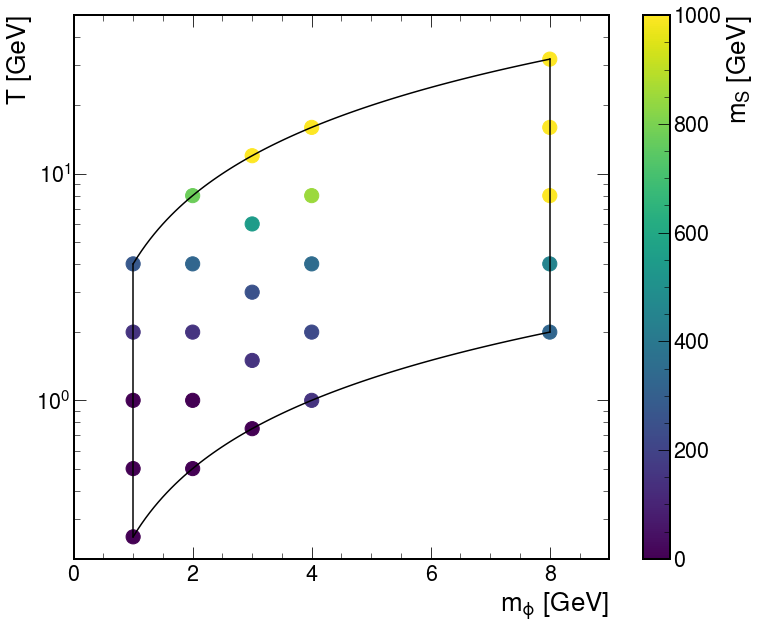

In [4]:
m_phi_space = lambda m_phi_max : np.linspace(1, m_phi_max, 100)
fig, ax = plt.subplots(1, figsize=(12, 10))
sc = ax.scatter(m_phi, temp, c=m_S_limit, s=200, vmin=0, vmax=1000)
cbar = plt.colorbar(sc, ax=ax)
ax.plot(m_phi_space(8), 0.25 * m_phi_space(8), 'black')
ax.plot(m_phi_space(8), 4 * m_phi_space(8), 'black')
ax.plot([1, 1], [0.25, 4], 'black')
ax.plot([8, 8], [2, 32], 'black')
#plt.plot(m_phi_space(4), 3-0.5*m_phi_space(4), 'r')
#plt.plot(m_phi_space(8), 4.25-0.27*m_phi_space(8), 'r')
ax.set_yscale('log')
ax.set_xlim(0,9)
ax.set_ylim(0.2, 50)
ax.set_xlabel(r'$m_{\phi}$ [GeV]')
ax.set_ylabel('T [GeV]')
cbar.set_label(r'$m_{S}$ [GeV]')

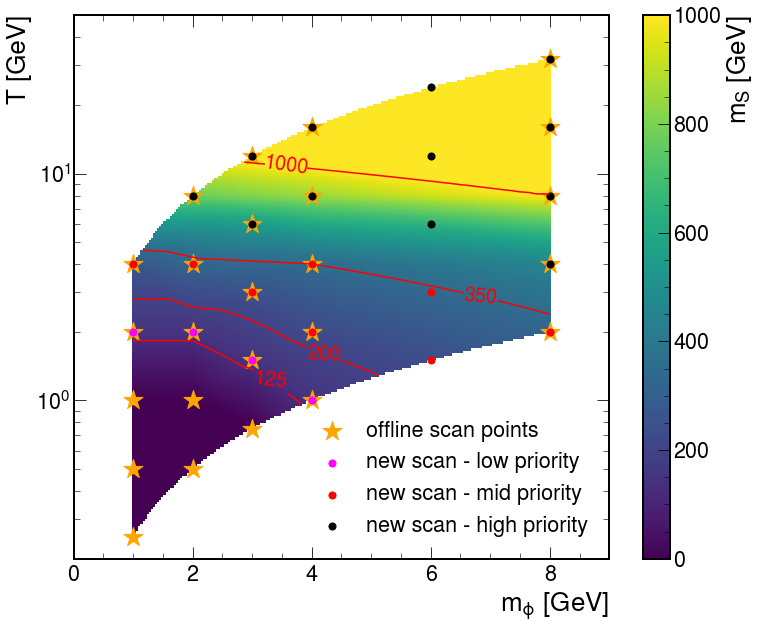

In [7]:
x = np.linspace(1, 8, 200)
y = np.logspace(np.log10(0.25), np.log10(32), 200)
grid_x, grid_y = np.meshgrid(x, y)
interpolation = griddata((m_phi, temp), m_S_limit, (grid_x, grid_y), method='linear')
fig, ax = plt.subplots(1, figsize=(12, 10))
sc = ax.pcolormesh(
    grid_x, 
    grid_y, 
    interpolation, 
    vmin=0, 
    vmax=1000,
    shading='auto',
)
cs = ax.contour(
    grid_x, 
    grid_y, 
    interpolation, 
    levels=[125, 200, 350, 1000],
    colors='r'
)
cbar = plt.colorbar(sc, ax=ax)
ax.clabel(cs, inline=1, fontsize=20)
ax.set_xlim(0, 9)
ax.set_ylim(0.2, 50)
ax.set_yscale('log')
plt.xlabel(r'$m_{\phi}$ [GeV]')
plt.ylabel('T [GeV]')
cbar.set_label(r'$m_{S}$ [GeV]')

# old scan
old_scan = np.array(
    [
        [1, 0.25],
        [1, 0.5],
        [2, 0.5],
        [3, 0.75],
        [1, 1],
        [2, 1],
        [4, 1],
        [3, 1.5],
        [1, 2],
        [2, 2],
        [4, 2],
        [8, 2],
        [3, 3],
        [1, 4],
        [2, 4],
        [4, 4],
        [8, 4],
        [3, 6],
        [2, 8],
        [4, 8],
        [8, 8],
        [3, 12],
        [4, 16],
        [8, 16],
        [8, 32],
    ]
)
old_scan_m_phi, old_scan_temp = old_scan[:, 0], old_scan[:, 1]
ax.scatter(old_scan_m_phi, old_scan_temp, color='orange', marker='*', s=400, label="offline scan points")

# new scan
new_scan_t3 = np.array(
    [
        [4, 1],
        [3, 1.5],
        [1, 2],
        [2, 2],
    ]
)
new_scan_m_phi_t3, new_scan_temp_t3 = new_scan_t3[:, 0], new_scan_t3[:, 1]

new_scan_t2 = np.array(
    [
        [6, 1.5],
        [4, 2],
        [8, 2],
        [3, 3],
        [6, 3],
        [1, 4],
        [2, 4],
        [4, 4],
    ]
)
new_scan_m_phi_t2, new_scan_temp_t2 = new_scan_t2[:, 0], new_scan_t2[:, 1]

new_scan_t1 = np.array(
    [
        [8, 4],
        [3, 6],
        [6, 6],
        [2, 8],
        [4, 8],
        [8, 8],
        [3, 12],
        [6, 12],
        [4, 16],
        [8, 16],
        [6, 24],
        [8, 32],
    ]
)
new_scan_m_phi_t1, new_scan_temp_t1 = new_scan_t1[:, 0], new_scan_t1[:, 1]

ax.scatter(new_scan_m_phi_t3, new_scan_temp_t3, color='magenta', marker='o', s=50, label="new scan - low priority")
ax.scatter(new_scan_m_phi_t2, new_scan_temp_t2, color='red', marker='o', s=50, label="new scan - mid priority")
ax.scatter(new_scan_m_phi_t1, new_scan_temp_t1, color='black', marker='o', s=50, label="new scan - high priority")
plt.legend()
plt.show()

In [119]:
print("Scan points:")
print(f"\told scan --> {len(old_scan)} points")
print(f"\tnew scan low priority --> {len(new_scan_t3)} points")
print(f"\tnew scan med priority --> {len(new_scan_t2)} points")
print(f"\tnew scan high priority --> {len(new_scan_t1)} points")

Scan points:
	old scan --> 25 points
	new scan low priority --> 4 points
	new scan med priority --> 8 points
	new scan high priority --> 12 points


Base working scenario is that we use the 12 high priority points + ~5 medium priority points, times 2 decays 

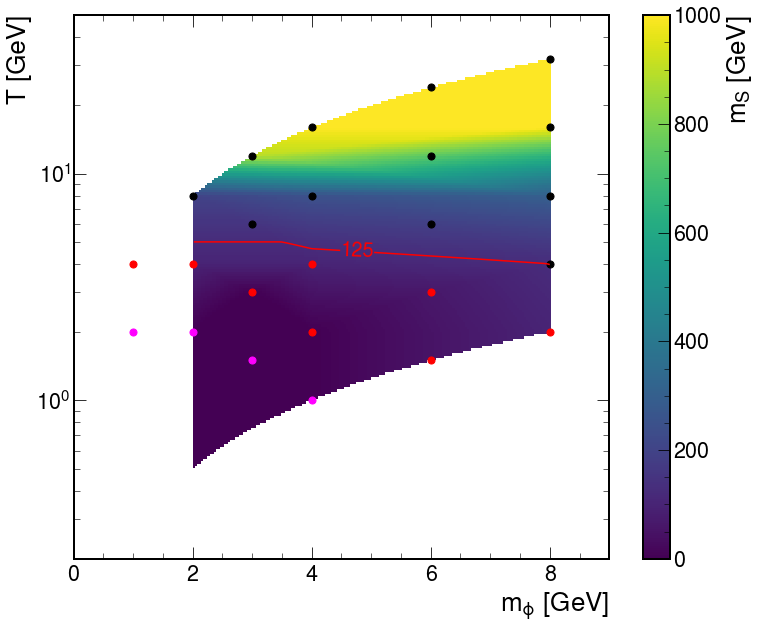

In [127]:
m_phi_vs_temp_scouting = np.array(
    [
        [2, 0.5],
        [3, 0.75],
        [2, 1],
        [4, 1],
        [3, 1.5],
        [2, 2],
        [4, 2],
        [8, 2],
        [3, 3],
        [2, 4],
        [4, 4],
        [8, 4],
        [3, 6],
        [2, 8],
        [4, 8],
        [8, 8],
        [3, 12],
        [4, 16],
        [8, 16],
        [8, 32],
    ]
)
m_phi_scouting, temp_scouting = m_phi_vs_temp_scouting[:, 0], m_phi_vs_temp_scouting[:, 1]
m_S_lim_scouting = np.array(
    [
        0, 0, 0, 0, 0, 0, 0, 100, 0, 100, 100, 125, 150, 200, 250, 300, 900, 1000, 1000, 1000
    ]
)
x = np.linspace(1, 8, 200)
y = np.logspace(np.log10(0.25), np.log10(32), 200)
grid_x, grid_y = np.meshgrid(x, y)
interpolation = griddata((m_phi_scouting, temp_scouting), m_S_lim_scouting, (grid_x, grid_y), method='linear')
fig, ax = plt.subplots(1, figsize=(12, 10))
sc = ax.pcolormesh(
    grid_x, 
    grid_y, 
    interpolation, 
    vmin=0, 
    vmax=1000,
    shading='auto',
)
cs = ax.contour(
    grid_x, 
    grid_y, 
    interpolation, 
    levels=[125],
    colors='r'
)
cbar = plt.colorbar(sc, ax=ax)
ax.clabel(cs, inline=1, fontsize=20)
ax.set_xlim(0, 9)
ax.set_ylim(0.2, 50)
ax.set_yscale('log')
plt.xlabel(r'$m_{\phi}$ [GeV]')
plt.ylabel('T [GeV]')
cbar.set_label(r'$m_{S}$ [GeV]')

ax.scatter(new_scan_m_phi_t3, new_scan_temp_t3, color='magenta', marker='o', s=50)
ax.scatter(new_scan_m_phi_t2, new_scan_temp_t2, color='red', marker='o', s=50)
ax.scatter(new_scan_m_phi_t1, new_scan_temp_t1, color='black', marker='o', s=50)
plt.show()

## New scan

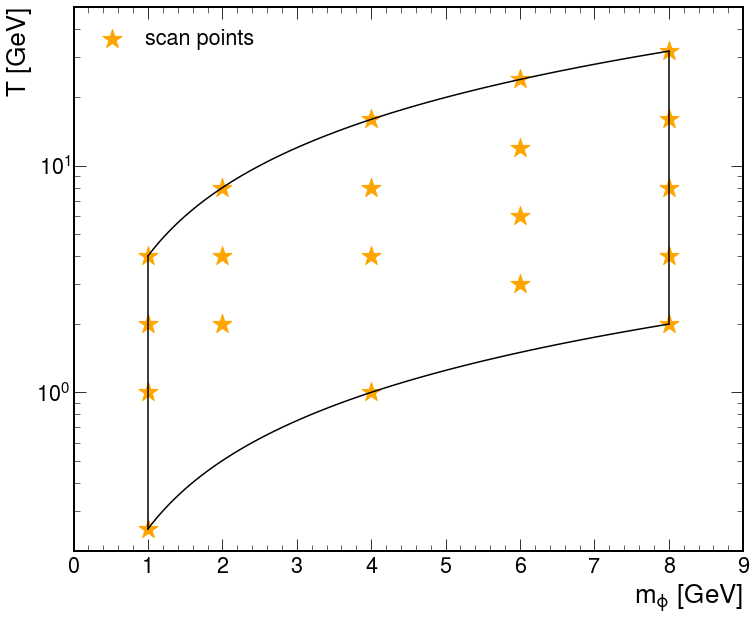

In [7]:
new_scan = np.array(
    [
        [1, 0.25],
        [1, 1],
        [1, 2],
        [1, 4],
        [2, 2],
        [2, 4],
        [2, 8],
        [4, 1],
        [4, 4],
        [4, 8],
        [4, 16],
        [6, 3],
        [6, 6],
        [6, 12],
        [6, 24],
        [8, 2],
        [8, 4],
        [8, 8],
        [8, 16],
        [8, 32],
    ]
)
new_scan_m_phi, new_scan_temp = new_scan[:, 0], new_scan[:, 1]
m_phi_space = lambda m_phi_max : np.linspace(1, m_phi_max, 100)
fig, ax = plt.subplots(1, figsize=(12, 10))
ax.scatter(new_scan_m_phi, new_scan_temp, color='orange', marker='*', s=400, label="scan points")
ax.plot(m_phi_space(8), 0.25 * m_phi_space(8), 'black')
ax.plot(m_phi_space(8), 4 * m_phi_space(8), 'black')
ax.plot([1, 1], [0.25, 4], 'black')
ax.plot([8, 8], [2, 32], 'black')
ax.set_yscale('log')
ax.set_xlim(0,9)
ax.set_ylim(0.2, 50)
ax.set_xlabel(r'$m_{\phi}$ [GeV]')
ax.set_ylabel('T [GeV]')
plt.legend()